In [114]:
from random import random
from math import sqrt

def uniform_generator(a,b):
    return a+(b-a)*random()

def uniform_generator_2d(a,b):
    return (uniform_generator(a,b),uniform_generator(a,b))

def realization_size(a,b,m):
    return [uniform_generator_2d(a,b) for i in range(m)]

def get_square(x1,y1,x2,y2):
    return (y2-y1)*(x2-x1)

def get_min_max_coordinates_H (l):
    x_y = [[min(a), max(a)] for a in zip(*l)]
    min_x = x_y[0][0]
    max_x = x_y[0][1]
    min_y = x_y[1][0]
    max_y = x_y[1][1]
    return (min_x,min_y,max_x,max_y)

def get_true_risk(h,q,x):
    return (q-h)/x

In [254]:
def true_risk_ERM(m):
    a_X = a_Q = 0
    b_X = 1
    b_Q = 1./sqrt(2)
    realization=realization_size(0,1/sqrt(2),m)
    coordinates_H = get_min_max_coordinates_H(realization)
    square_H = get_square(*coordinates_H)
    square_X = get_square(a_X,a_X,b_X,b_X)
    square_Q = get_square(a_Q,a_Q,b_Q,b_Q)
    return get_true_risk(square_H,square_Q,square_X)
    
true_risk_ERM(1000)

0.003074535273368595

# График true risk в зависимости от m

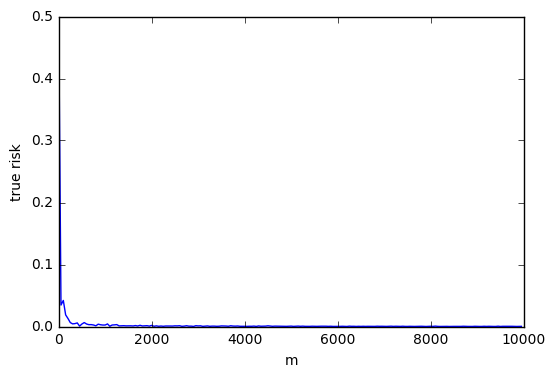

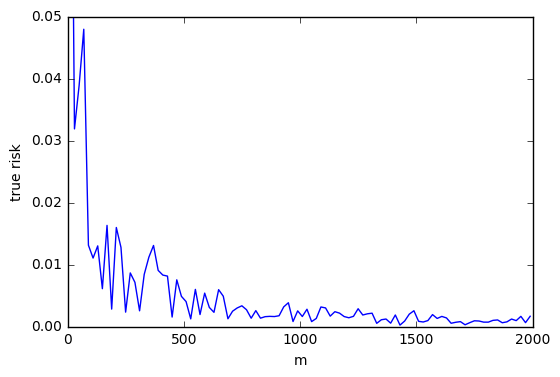

In [232]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_true_risk(start=1, stop=10000, step=50,y_lim=0.5):
    m1 = np.arange(start, stop, step)
    true_risk = [true_risk_ERM(i) for i in m1]
    plt.figure(1)   
    ax = plt.subplot(111)
    line, = plt.plot(m1, true_risk,  lw=1)
    plt.ylim(0,y_lim)
    plt.xlabel('m')
    plt.ylabel('true risk')
    return plt
    
plot_true_risk().show()
plot_true_risk(10, 2000, 20, 0.05).show()


In [253]:
n = 4000
tr1 = 0.1
tr2 = 0.01
tr3 = 0.001
p1_m = p2_m = p3_m = 0
average_tr1 = average_tr2 = average_tr3 = 0
# по 10 реализациям СВ оценивается размер выборки m, после которой true_risk меньше заданного порога {10%,1%,0.1%}
iteration_count = 10
for i in xrange(iteration_count):  
    for m in xrange(1,n,1):
        t_r = true_risk_ERM(m)
        if (t_r >= tr1):
            p1_m=m
        elif ( t_r >= tr2):
            p2_m=m
        elif  ( t_r >= tr3):
            p3_m = m
    average_tr1 += p1_m
    average_tr2 += p2_m
    average_tr3 += p3_m

average_tr1 /=  iteration_count
average_tr2 /=  iteration_count
average_tr3 /=  iteration_count

print('Average sample size with {0} true risk: {1}'.format(tr1,average_tr1))
print('Average sample size with {0} true risk: {1}'.format(tr2,average_tr2))
print('Average sample size with {0} true risk: {1}'.format(tr3,average_tr3))

Average sample size with 0.1 true risk: 26
Average sample size with 0.01 true risk: 482
Average sample size with 0.001 true risk: 3971
